### Name: Tan Thanh Nguyen
### Date: 14/03/2024

# BUSINESS UNDERSTANDING
***

There are two business problem that can define from this dataset: 
1. Song Recommendation: propose a list of song that have the similarity match with audience's hobby
-> With this business problem, the technique can be used is clustering with KMeans cluster algorithm
2. Popularity Prediction: predict the popularity of a song to consider wether the artists should produce it or not
-> With this business problem, there are 2 techniques can be considered, classification and regression. However, there should be data visualization in data understanding stage to consider it

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
# Reading CSV files
file_path = "spotify-dataset.csv"
data = pd.read_csv(file_path)
#We'll define an object df and assign data to df, so that we can differentiate between them, or back them up.
df = data

# DATA UNDERSTANDING
***

In [2]:
#See the data types of columns in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [3]:
#Viewing missing values in a dataset
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [4]:
#Display categorical variables 
df.select_dtypes(include=["object","bool"]).describe()

,track_id,artists,album_name,track_name,explicit,track_genre
count,114000,113999,113999,113999,114000,114000
unique,89741,31437,46589,73608,2,114
top,6S3JlDAGk3uu3NtZbPnuhS,The Beatles,Alternative Christmas 2022,Run Rudolph Run,False,acoustic
freq,9,279,195,151,104253,1000


In [5]:
#Display continuous variable
pd.options.display.float_format = '{:.2f}'.format 
df.select_dtypes(include=["int64","float64"]).describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00
mean,56999.50,33.24,228029.15,0.57,0.64,5.31,-8.26,0.64,0.08,0.31,0.16,0.21,0.47,122.15,3.90
std,32909.11,22.31,107297.71,0.17,0.25,3.56,5.03,0.48,0.11,0.33,0.31,0.19,0.26,29.98,0.43
min,0.00,0.00,0.00,0.00,0.00,0.00,-49.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,28499.75,17.00,174066.00,0.46,0.47,2.00,-10.01,0.00,0.04,0.02,0.00,0.10,0.26,99.22,4.00
50%,56999.50,35.00,212906.00,0.58,0.69,5.00,-7.00,1.00,0.05,0.17,0.00,0.13,0.46,122.02,4.00
75%,85499.25,50.00,261506.00,0.69,0.85,8.00,-5.00,1.00,0.08,0.60,0.05,0.27,0.68,140.07,4.00
max,113999.00,100.00,5237295.00,0.98,1.00,11.00,4.53,1.00,0.96,1.00,1.00,1.00,0.99,243.37,5.00


In [6]:
#Remove missing values by behavioral criteria
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113999 non-null  int64  
 1   track_id          113999 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        113999 non-null  int64  
 6   duration_ms       113999 non-null  int64  
 7   explicit          113999 non-null  bool   
 8   danceability      113999 non-null  float64
 9   energy            113999 non-null  float64
 10  key               113999 non-null  int64  
 11  loudness          113999 non-null  float64
 12  mode              113999 non-null  int64  
 13  speechiness       113999 non-null  float64
 14  acousticness      113999 non-null  float64
 15  instrumentalness  113999 non-null  float64
 16  liveness          113999 

The Business Understanding is proposing 

In [7]:
#Drop irrelevant variables
df.drop((['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name']), axis=1, inplace=True)

C:\Users\ntt68\AppData\Local\Temp\ipykernel_10520\3534416601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop((['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name']), axis=1, inplace=True)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        113999 non-null  int64  
 1   duration_ms       113999 non-null  int64  
 2   explicit          113999 non-null  bool   
 3   danceability      113999 non-null  float64
 4   energy            113999 non-null  float64
 5   key               113999 non-null  int64  
 6   loudness          113999 non-null  float64
 7   mode              113999 non-null  int64  
 8   speechiness       113999 non-null  float64
 9   acousticness      113999 non-null  float64
 10  instrumentalness  113999 non-null  float64
 11  liveness          113999 non-null  float64
 12  valence           113999 non-null  float64
 13  tempo             113999 non-null  float64
 14  time_signature    113999 non-null  int64  
 15  track_genre       113999 non-null  object 
dtypes: bool(1), float64(9), i

<Axes: >

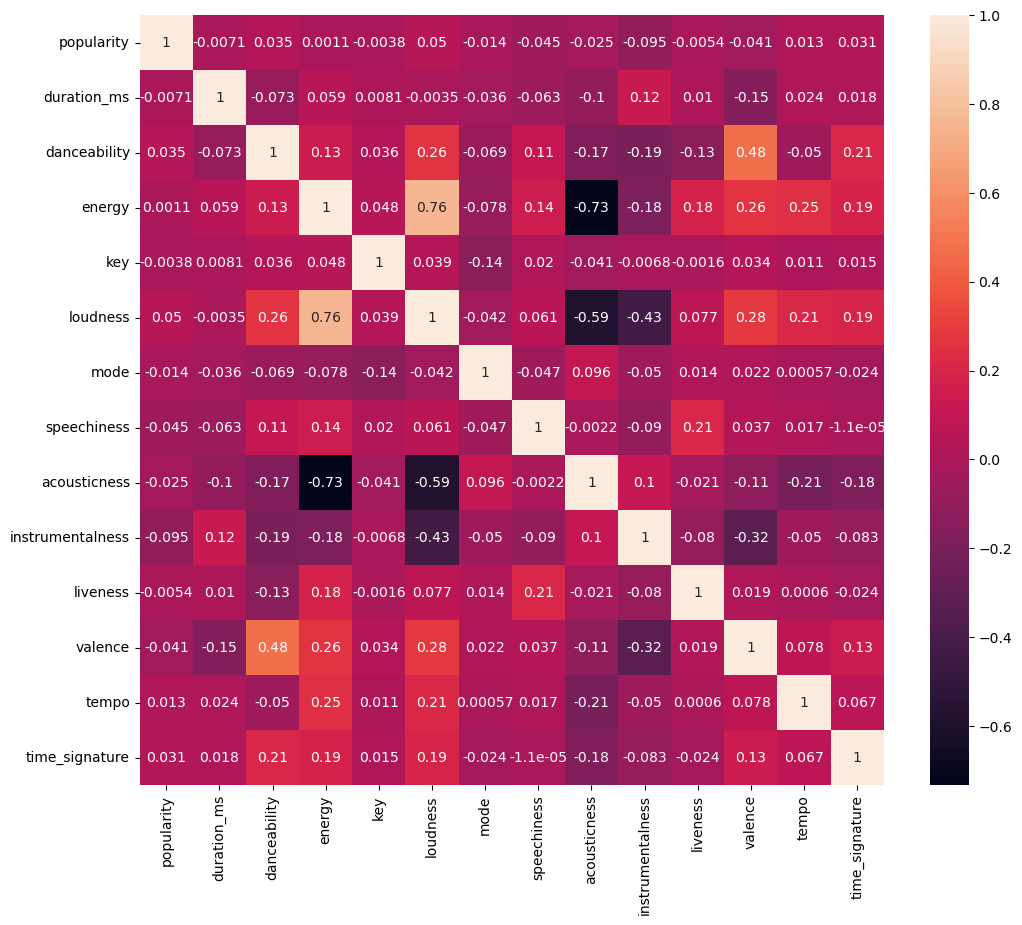

In [9]:
#Display the correlation with heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.select_dtypes(include=["int64","float64"]).corr(), annot=True)

***
Overall, variables in the dataset are not correlated with each other. Hence, the regression technique is not suitable for this dataset and I decide to use Clustering with KMeans cluster and Classification with Random Forrest

# DATA PREPROCESSING FOR KMEANS CLUSTER
***

In [10]:
#Create dummy variables for track_genre column
df_track_genre = pd.get_dummies(df['track_genre'])
df_track_genre = df_track_genre.astype(int)
df_track_genre.head(5)

,acoustic,afrobeat,alt-rock,alternative,ambient,anime,black-metal,bluegrass,blues,brazil,...,spanish,study,swedish,synth-pop,tango,techno,trance,trip-hop,turkish,world-music
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#Create dummy variables for explicit column
df_explicit = pd.get_dummies(df['explicit'])
df_explicit = df_explicit.astype(int)
df_explicit.columns = df_explicit.columns.astype(str)
df_explicit.head(5)

,False,True
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [12]:
#Finish process dataset with dummy variables
df_with_dummies = df.join(df_track_genre).join(df_explicit)
df_with_dummies.drop((['track_genre', 'explicit']), axis=1, inplace=True)
df_with_dummies.head(5)

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,swedish,synth-pop,tango,techno,trance,trip-hop,turkish,world-music,False,True
0,73,230666,0.68,0.46,1,-6.75,0,0.14,0.03,0.00,...,0,0,0,0,0,0,0,0,1,0
1,55,149610,0.42,0.17,1,-17.23,1,0.08,0.92,0.00,...,0,0,0,0,0,0,0,0,1,0
2,57,210826,0.44,0.36,0,-9.73,1,0.06,0.21,0.00,...,0,0,0,0,0,0,0,0,1,0
3,71,201933,0.27,0.06,0,-18.52,1,0.04,0.91,0.00,...,0,0,0,0,0,0,0,0,1,0
4,82,198853,0.62,0.44,2,-9.68,1,0.05,0.47,0.00,...,0,0,0,0,0,0,0,0,1,0


In [13]:
#With KMeans cluster, the Normalization scaled will be more suitable than Standardization
from sklearn.preprocessing import MinMaxScaler

#Create a variable called standardScaler by instantiating the class StandardScaler.
minmaxscaler = MinMaxScaler()

#Scale the dataset
columns_scaled = np.array(df_with_dummies.columns.astype(str))
data_scaled = minmaxscaler.fit_transform(df_with_dummies)
df_with_dummies_scaled = pd.DataFrame(data_scaled, columns = columns_scaled)
df_with_dummies_scaled.head(5)

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,swedish,synth-pop,tango,techno,trance,trip-hop,turkish,world-music,False,True
0,0.73,0.04,0.69,0.46,0.09,0.79,0.00,0.15,0.03,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
1,0.55,0.03,0.43,0.17,0.09,0.60,1.00,0.08,0.93,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
2,0.57,0.04,0.44,0.36,0.00,0.74,1.00,0.06,0.21,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
3,0.71,0.04,0.27,0.06,0.00,0.57,1.00,0.04,0.91,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
4,0.82,0.04,0.63,0.44,0.18,0.74,1.00,0.05,0.47,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00


# MODELING FOR KMEANS CLUSTER
***

In [14]:
from sklearn.cluster import KMeans

n_clusters = range(1,11)
wcss = []

for n in n_clusters:
    km = KMeans(n_clusters=n, max_iter=300, n_init=10, init='k-means++', random_state=0)
    km.fit(df_with_dummies_scaled)
    wcss.append(km.inertia_) 

for n, s in zip(n_clusters, wcss):
    print('Number of Clusters = {}, Sum of Squared Distances = {}'.format(n, s))

C:\Users\ntt68\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\ntt68\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


Number of Clusters = 1, Sum of Squared Distances = 226019.5043478763
Number of Clusters = 2, Sum of Squared Distances = 199152.7478009042
Number of Clusters = 3, Sum of Squared Distances = 183069.25182815362
Number of Clusters = 4, Sum of Squared Distances = 173424.16564121333
Number of Clusters = 5, Sum of Squared Distances = 168768.42106726955
Number of Clusters = 6, Sum of Squared Distances = 164480.0521986254
Number of Clusters = 7, Sum of Squared Distances = 161283.32563458013
Number of Clusters = 8, Sum of Squared Distances = 158291.5295034384
Number of Clusters = 9, Sum of Squared Distances = 155882.04386792646
Number of Clusters = 10, Sum of Squared Distances = 153629.8693445057


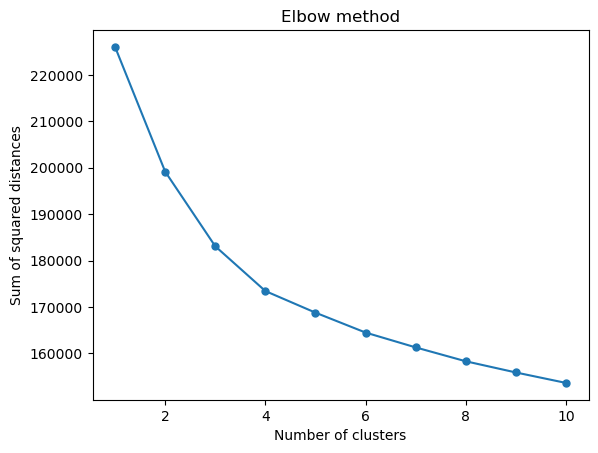

In [15]:
#Visualize the Elbow method to find the optimal number of clusters
plt.plot(n_clusters, wcss, marker='.', markersize=10)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method')
plt.show()

Here I decide to split the dataset to 4 clusters for optimal result

In [16]:
#Select 4 clusters to build the model
k = 4
k_means_cluster = KMeans(n_clusters=k, random_state=0).fit(df_with_dummies_scaled)
print('10 first clusters: ', k_means_cluster.labels_[:10])

C:\Users\ntt68\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


10 first clusters:  [2 1 3 1 1 3 1 3 3 3]


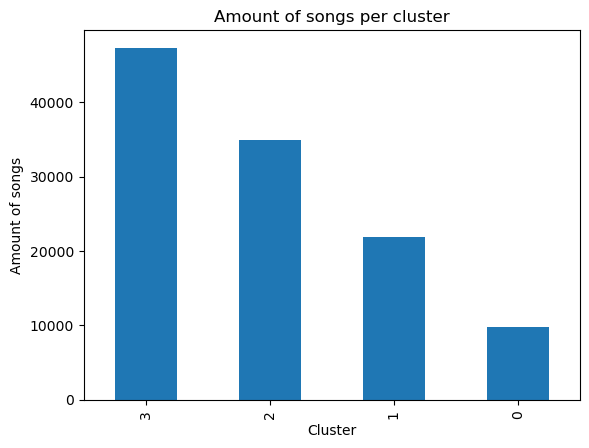

In [17]:
#Display number of variables in each clusters
df_with_dummies_scaled['cluster'] = k_means_cluster.labels_ #Naming the cluster column

#Create the diagram
df_with_dummies_scaled['cluster'].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Amount of songs')
plt.title('Amount of songs per cluster')
plt.show()

In [18]:
#I drop three first columns in the original dataframe so I need to call another
df1 = pd.read_csv(file_path)
df1 = df1.dropna()
#Merge 2 dataframes because they have the same sequence
df_joined = pd.concat([df1,df_with_dummies_scaled], axis=1).set_index('cluster')
#Display 10 first songs in each cluster
for cluster in range(k):
    display(df_joined.loc[cluster, ['artists', 'album_name', 'track_name']].sample(frac=1).head(10))

,artists,album_name,track_name
cluster,,,
0.00,Christopher Titus,Neverlution!,Neverlution
0.00,iamjakehill,Follow Me Into Hell,Satin Black
0.00,Poshlaya Molly,Грустная девчонка с глазами как у собаки,Типичная вечеринка с бассейном
0.00,Eshconinco,Dream Life,SHE Like IT
0.00,Counting Crows,Fiesta temática 90s,Mr. Jones
0.00,JBee,Talking Stage,Talking Stage
0.00,Violent Femmes,Add It Up (1981-1993),"Dance, Motherfucker, Dance!"
0.00,Catnapp,TRUST,forget
0.00,Burna Boy,Pree Me,Pree Me


,artists,album_name,track_name
cluster,,,
1.00,Billie Eilish,my future,my future
1.00,alva noto;Ryuichi Sakamoto,Two (Live at Sydney Opera House),Trioon II - Live
1.00,Astor Piazzolla;Roberto Goyeneche,Astor Piazzolla/ Roberto Goyeneche,La Ultima Curda - En Vivo Teatro Regina 1982
1.00,蔣志光;王利名,相逢.走,要走的始終都要走
1.00,Lauren Spencer Smith,Frühstücksmusik Herbst/Winter 2022/2023,Flowers
1.00,Atlanta Rhythm Section,Sweet Home Alabama,Beautiful Dreamer
1.00,Piano Peace,Piano Therapy: Spa & Sleep Healing,Clarity
1.00,Ble0,Lightzone,Lightzone
1.00,Watchhouse,Haste Make / Hard Hearted Stranger,Lines on the Floor


,artists,album_name,track_name
cluster,,,
2.00,Mike Williams;Justin Mylo;Sara Sangfelt,Face Up To The Sun,Face Up To The Sun
2.00,Keeno,Futurist,The Chase
2.00,The Prodigy,The Day Is My Enemy,Invisible Sun
2.00,Netsky,2 Deluxe,911
2.00,Nazan Öncel,Hayvan,Beni Bu Koca Şehirde Yalnız Bırakma
2.00,Elvis Presley,From Elvis in Memphis,In the Ghetto
2.00,Justin Bieber,Fiesta de disfraces vol. II,Sorry
2.00,ODESZA;Izzy Bizu,The Last Goodbye,Forgive Me (feat. Izzy Bizu)
2.00,BOØWY,"""GIGS"" CASE OF BOφWY COMPLETE (Live From ""Gigs...","ON MY BEAT - FROM ""GIGS"" CASE OF BOOWY"


,artists,album_name,track_name
cluster,,,
3.00,Unleash The Archers,Time Stands Still,Crypt
3.00,Michael Ray,New Country,Holy Water
3.00,Fitz and The Tantrums,Fitz and The Tantrums,HandClap
3.00,Doja Cat,Summer Music Festival Hits,Boss Bitch
3.00,Lisa Ekdahl,Stop! In the Name of Love,Stop! In the Name of Love
3.00,Só Pra Contrariar,Só Pra Contrariar,Mineirinho
3.00,Brings,Dat wor geil - 20 Jahre Brings Musik,Du Bes Kölle - Live from Rhein-Energie-Stadion...
3.00,The Platters,The Magic Touch: An Anthology,Only You (And You Alone)
3.00,Pritam;Arijit Singh;Antara Mitra;Nikhil D'Souza,"Dil Hi Toh Hai (From ""The Sky Is Pink"")",Dil Hi Toh Hai


# EVALUATION FOR KMEANS CLUSTER
***

In [19]:
#Using PCA method to visualize the model
from sklearn.decomposition import PCA

pca = PCA(n_components = len(df_with_dummies_scaled.columns) - 1, random_state=0)
data_pca = pca.fit_transform(df_with_dummies_scaled)

In [20]:
df_pca = pd.DataFrame(data_pca, columns = columns_scaled)
df_pca['cluster'] = k_means_cluster.labels_
df_pca.head()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,synth-pop,tango,techno,trance,trip-hop,turkish,world-music,False,True,cluster
0,0.06,-0.57,0.07,-0.13,-0.56,-0.10,-0.35,0.08,-0.09,0.21,...,0.01,-0.03,0.01,0.01,0.08,-0.08,0.05,0.00,0.00,2
1,1.06,0.78,0.43,-0.21,-0.37,-0.29,-0.13,-0.11,-0.06,0.03,...,-0.03,-0.05,0.03,-0.02,-0.04,-0.06,-0.07,-0.01,0.00,1
2,-0.93,0.43,0.06,0.19,-0.40,-0.45,-0.16,-0.18,0.29,0.06,...,-0.02,-0.03,0.05,-0.05,0.06,-0.04,0.01,-0.01,0.00,3
3,1.07,0.82,0.48,-0.11,-0.44,-0.51,-0.20,-0.07,-0.09,-0.12,...,0.10,0.06,0.03,-0.03,-0.05,-0.02,-0.07,-0.00,0.00,1
4,0.97,0.54,0.08,-0.03,-0.26,-0.44,-0.35,-0.19,-0.32,0.19,...,-0.02,0.03,-0.01,-0.00,0.10,-0.01,-0.02,-0.00,0.00,1


In [21]:
#Count the number of variables in each cluster
display(df_with_dummies_scaled['cluster'].value_counts())

cluster
3    47333
2    34963
1    21956
0     9747
Name: count, dtype: int64

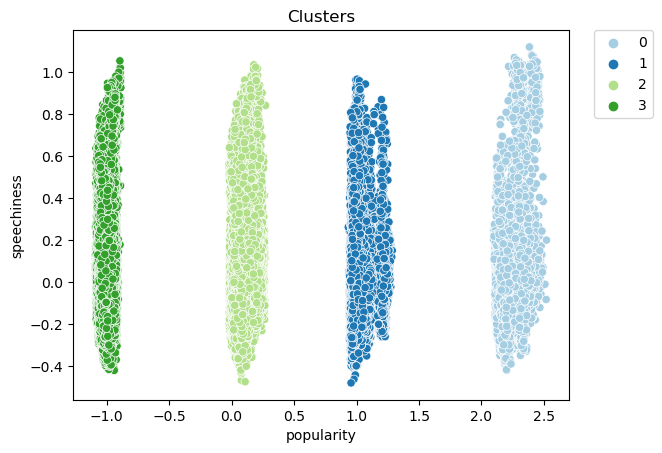

In [22]:
#Display the cluster of 2 variables using PCA
sns.scatterplot(x = 'popularity', y = 'speechiness', hue = 'cluster', data = df_pca, legend = 'full', palette = 'Paired')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Clusters')
plt.show()

The allocation of variables in each clusters are overall good

# DATA PREPROCESSING FOR RANDOM FOREST
***

In [23]:
#Create a dataframe for Random Forest model
df_with_dummies_reg = df_with_dummies

#Here to match with business problem, every songs which have the popularity over 50 will be considered to product else no produce
df_with_dummies_reg['popularity_binary'] = df_with_dummies_reg['popularity'].apply(lambda x: 1 if x > 50 else 0)
df_with_dummies_reg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Columns: 131 entries, popularity to popularity_binary
dtypes: float64(9), int32(116), int64(6)
memory usage: 68.4 MB


In [24]:
#Count the number of both positive and negative decison variables
popularity_count = df_with_dummies_reg['popularity_binary'].value_counts()
print(popularity_count)

popularity_binary
0    86229
1    27770
Name: count, dtype: int64


Not very imbalance dataset

In [25]:
df_with_dummies_reg.drop('popularity', axis=1, inplace=True)
df_with_dummies_reg.head(5)

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,synth-pop,tango,techno,trance,trip-hop,turkish,world-music,False,True,popularity_binary
0,230666,0.68,0.46,1,-6.75,0,0.14,0.03,0.00,0.36,...,0,0,0,0,0,0,0,1,0,1
1,149610,0.42,0.17,1,-17.23,1,0.08,0.92,0.00,0.10,...,0,0,0,0,0,0,0,1,0,1
2,210826,0.44,0.36,0,-9.73,1,0.06,0.21,0.00,0.12,...,0,0,0,0,0,0,0,1,0,1
3,201933,0.27,0.06,0,-18.52,1,0.04,0.91,0.00,0.13,...,0,0,0,0,0,0,0,1,0,1
4,198853,0.62,0.44,2,-9.68,1,0.05,0.47,0.00,0.08,...,0,0,0,0,0,0,0,1,0,1


In [26]:
#Predicted value
y = df_with_dummies_reg['popularity_binary'].to_numpy()
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [27]:
#With Random Forest algorithm I use Standardization scale
from sklearn.preprocessing import StandardScaler

#Create a variable called standardScaler by instantiating the class StandardScaler.
standardscaler = StandardScaler()

columns_scaled_reg = np.array(df_with_dummies_reg.columns.astype(str))
data_scaled_reg = standardscaler.fit_transform(df_with_dummies_reg)
df_with_dummies_reg_scaled = pd.DataFrame(data_scaled_reg, columns = columns_scaled_reg)
df_with_dummies_reg_scaled.head(5)

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,synth-pop,tango,techno,trance,trip-hop,turkish,world-music,False,True,popularity_binary
0,0.02,0.63,-0.72,-1.21,0.30,-1.33,0.55,-0.85,-0.50,0.76,...,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,0.31,-0.31,1.76
1,-0.73,-0.85,-1.89,-1.21,-1.78,0.75,-0.08,1.83,-0.50,-0.59,...,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,0.31,-0.31,1.76
2,-0.16,-0.74,-1.12,-1.49,-0.29,0.75,-0.27,-0.32,-0.50,-0.51,...,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,0.31,-0.31,1.76
3,-0.24,-1.73,-2.31,-1.49,-2.04,0.75,-0.46,1.77,-0.50,-0.43,...,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,0.31,-0.31,1.76
4,-0.27,0.30,-0.79,-0.93,-0.28,0.75,-0.30,0.46,-0.50,-0.69,...,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,0.31,-0.31,1.76


In [28]:
#Dependent variables X
df_X = df_with_dummies_reg_scaled
df_X.drop('popularity_binary', axis=1, inplace=True)
X = df_X.to_numpy()
X

array([[ 0.0245569 ,  0.62923855, -0.71714698, ..., -0.0940725 ,
         0.30576888, -0.30576888],
       [-0.7308889 , -0.84590813, -1.88997393, ..., -0.0940725 ,
         0.30576888, -0.30576888],
       [-0.16035285, -0.74218688, -1.12266681, ..., -0.0940725 ,
         0.30576888, -0.30576888],
       ...,
       [ 0.40481485,  0.35841084, -1.24193735, ..., 10.63009878,
         0.30576888, -0.30576888],
       [ 0.52063508,  0.11639459, -0.53824118, ..., 10.63009878,
         0.30576888, -0.30576888],
       [ 0.12856863, -0.23510521, -0.61377919, ..., 10.63009878,
         0.30576888, -0.30576888]])

# MODELING FOR RANDOM FOREST
***

In [29]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=292)

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier model
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=292)

# Train the model on the training set
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=292)

# EVALUATION FOR RANDOM FOREST
***

In [31]:
# Predictions on the test set using the trained model
y_pred = random_forest_classifier.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
sensitivity_recall = metrics.recall_score(y_test, y_pred)
specificity = metrics.recall_score(y_test, y_pred, pos_label=0)

print(f'The accuracy of Random Forest model is: {accuracy*100:.2f}%')
print(f'The precision of Random Forest model is: {precision*100:.2f}%')
print(f'The sensitivity of Random Forest model is: {sensitivity_recall*100:.2f}%')
print(f'The specificity of Random Forest model is: {specificity*100:.2f}%')

The accuracy of Random Forest model is: 84.00%
The precision of Random Forest model is: 76.72%
The sensitivity of Random Forest model is: 49.17%
The specificity of Random Forest model is: 95.20%


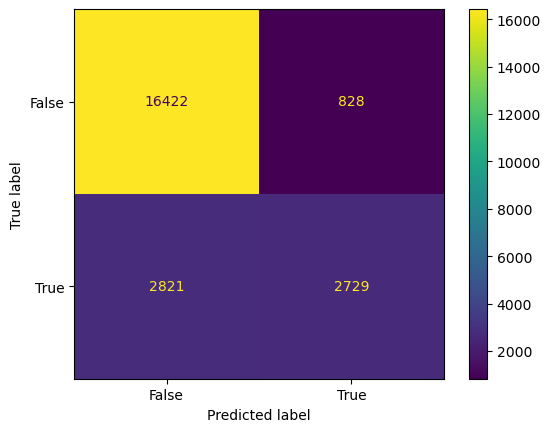

In [32]:
#Display the confusion matrix for evaluation
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

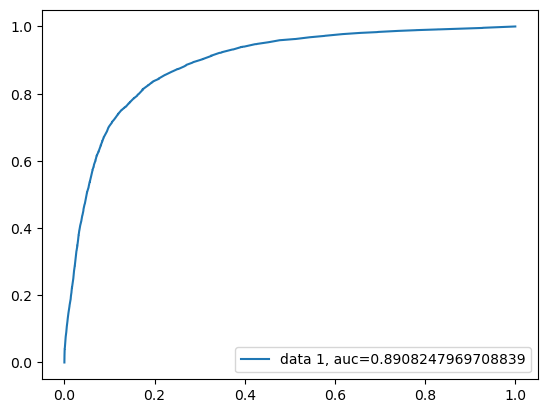

In [33]:
#Display the ROC Curve for evaluation
y_pred_proba = random_forest_classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Positive value prediction is not very impressive when looking at precision and sensitivity value. However, depend on the business problem the artist may want to mitigate the risk as much as possible so that the model might still be suitable.
Alternatively, if the artist want to balance the decision result, we can regards the ROC Curve to change the threshold and the optimal value for both sepecificity and sensitivity will be 80%

In [34]:
#Display the P value for backward elimination method
import statsmodels.api as sm 
num_columns = df_X.shape[1]  # Replace n with the actual number of columns in your table
X_train_opt = np.append(arr = np.ones((len(X_train),1)).astype(int), values = X_train, axis = 1) 
X_train_opt = X_train_opt[:,list(range(1, num_columns + 1))] 
regressor_OLS = sm.OLS(endog = y_train, exog = X_train_opt).fit()
summary_OLS = regressor_OLS.summary()
summary_OLS

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.172
Model:                            OLS   Adj. R-squared (uncentered):              0.170
Method:                 Least Squares   F-statistic:                              148.6
Date:                Wed, 13 Mar 2024   Prob (F-statistic):                        0.00
Time:                        17:19:28   Log-Likelihood:                         -56430.
No. Observations:               91199   AIC:                                  1.131e+05
Df Residuals:                   91072   BIC:                                  1.143e+05
Df Model:                         127                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0088      0.002     -5.097      0.000      -0.012      -0.005
x2             0.0160      0.002      7.196      0.000       0.012       0.020
x3            -0.0197      0.003     -5.922      0.000      -0.026      -0.013
x4            -0.0017      0.002     -1.135      0.256      -0.005       0.001
x5             0.0104      0.003      3.513      0.000       0.005       0.016
x6            -0.0053      0.002     -3.379      0.001      -0.008      -0.002
x7            -0.0109      0.002     -5.241      0.000      -0.015      -0.007
x8            -0.0115      0.003     -4.461      0.000      -0.017      -0.006
x9            -0.0052      0.002     -2.413      0.016      -0.009      -0.001
x10           -0.0128      0.002     -7.711      0.000      -0.016      -0.010
x11           -0.0187      0.002     -8.962      0.000      -0.023      -0.015
x12            0.0017      0.002      1.088      0.277      -0.001       0.005
x13            0.0060      0.002      3.846      0.000       0.003       0.009
x14            0.0130      0.001      8.703      0.000       0.010       0.016
x15           -0.0192      0.001    -12.994      0.000      -0.022      -0.016
x16            0.0094      0.001      6.332      0.000       0.006       0.012
x17            0.0058      0.001      3.939      0.000       0.003       0.009
x18            0.0226      0.002     14.587      0.000       0.020       0.026
x19            0.0212      0.001     14.289      0.000       0.018       0.024
x20           -0.0192      0.002    -12.609      0.000      -0.022      -0.016
x21           -0.0175      0.001    -11.846      0.000      -0.020      -0.015
x22            0.0091      0.001      6.115      0.000       0.006       0.012
x23           -0.0126      0.001     -8.577      0.000      -0.015      -0.010
x24           -0.0195      0.002    -12.980      0.000      -0.022      -0.017
x25            0.0272      0.001     18.392      0.000       0.024       0.030
x26           -0.0124      0.001     -8.364      0.000      -0.015      -0.010
x27           -0.0222      0.002    -14.453      0.000      -0.025      -0.019
x28           -0.0047      0.001     -3.157      0.002      -0.008      -0.002
x29            0.0458      0.001     30.787      0.000       0.043       0.049
x30           -0.0159      0.002    -10.035      0.000      -0.019      -0.013
x31           -0.0171      0.001    -11.412      0.000      -0.020      -0.014
x32           -0.0111      0.002     -5.711      0.000      -0.015      -0.007
x33           -0.0080      0.001     -5.331      0.000      -0.011      -0.005
x34           -0.0004      0.002     -0.274      0.784      -0.003       0.003
x35            0.0029      0.001      1.966      0.049    9.0

In [35]:
#Display list of non significant variables
p_values = summary_OLS.tables[1].data
p_values = [float(row[4]) for row in p_values[1:]]

t = 0.05  # Assuming alpha = 0.05
column_names_reg = df_X.columns.tolist()
# Show all P > t
for i, p_value in enumerate(p_values):
    if p_value > t:
        print(f"{column_names_reg[i]}: P-value = {p_value} > {t} (Not statistically significant)")

key: P-value = 0.256 > 0.05 (Not statistically significant)
tempo: P-value = 0.277 > 0.05 (Not statistically significant)
dance: P-value = 0.784 > 0.05 (Not statistically significant)
hardcore: P-value = 0.761 > 0.05 (Not statistically significant)
industrial: P-value = 0.069 > 0.05 (Not statistically significant)
latino: P-value = 0.131 > 0.05 (Not statistically significant)
punk: P-value = 0.67 > 0.05 (Not statistically significant)
reggaeton: P-value = 0.136 > 0.05 (Not statistically significant)
rock: P-value = 0.776 > 0.05 (Not statistically significant)
rockabilly: P-value = 0.52 > 0.05 (Not statistically significant)
sertanejo: P-value = 0.836 > 0.05 (Not statistically significant)
soul: P-value = 0.615 > 0.05 (Not statistically significant)
swedish: P-value = 0.777 > 0.05 (Not statistically significant)
techno: P-value = 0.695 > 0.05 (Not statistically significant)
world-music: P-value = 0.325 > 0.05 (Not statistically significant)


In [36]:
df_X.drop('sertanejo', axis=1, inplace=True)
X = df_X.to_numpy()
X

array([[ 0.0245569 ,  0.62923855, -0.71714698, ..., -0.0940725 ,
         0.30576888, -0.30576888],
       [-0.7308889 , -0.84590813, -1.88997393, ..., -0.0940725 ,
         0.30576888, -0.30576888],
       [-0.16035285, -0.74218688, -1.12266681, ..., -0.0940725 ,
         0.30576888, -0.30576888],
       ...,
       [ 0.40481485,  0.35841084, -1.24193735, ..., 10.63009878,
         0.30576888, -0.30576888],
       [ 0.52063508,  0.11639459, -0.53824118, ..., 10.63009878,
         0.30576888, -0.30576888],
       [ 0.12856863, -0.23510521, -0.61377919, ..., 10.63009878,
         0.30576888, -0.30576888]])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest_classifier.fit(X_train, y_train)

# Predictions on the test set using the trained model
y_pred_lo = random_forest_classifier.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred_lo)
print(f'The accuracy of  model is: {accuracy*100:.2f}%')

The accuracy of  model is: 84.15%


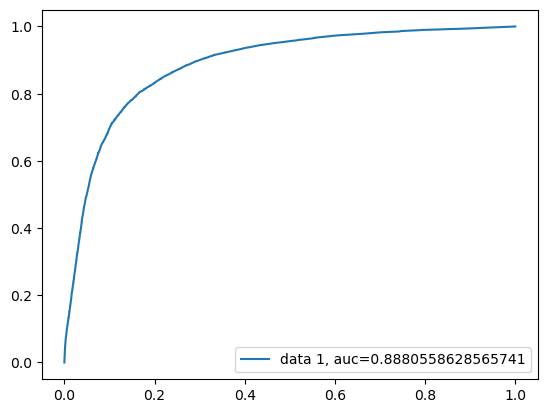

In [38]:
y_pred_probab = random_forest_classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_probab)
auc = metrics.roc_auc_score(y_test, y_pred_probab)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [39]:
df_X.drop('dance', axis=1, inplace=True)
X = df_X.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest_classifier.fit(X_train, y_train)

# Predictions on the test set using the trained model
y_pred_lo = random_forest_classifier.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred_lo)
print(f'The accuracy of  model is: {accuracy*100:.2f}%')

The accuracy of  model is: 84.00%


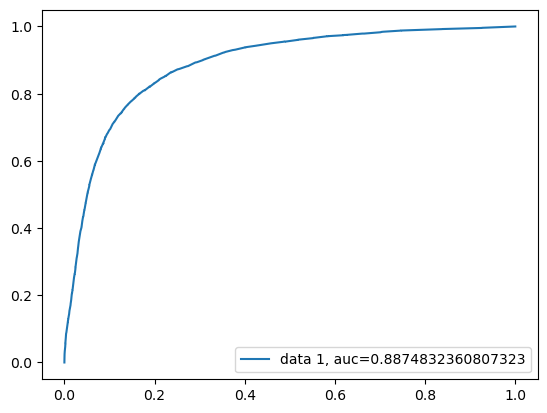

In [40]:
y_pred_proba = random_forest_classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC value is not improved

In [41]:
import pickle
# %% Save the model to a pickle file
filename_clustering = "k_means_cluster.pickle"
filename_classification = "random_forest_classifier.pickle"
# save model
pickle.dump(k_means_cluster, open(filename_clustering, "wb"))
pickle.dump(random_forest_classifier, open(filename_classification, "wb"))
